<center><h1>Hong_Seungil_HW2</h1></center>
<br>
<br>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
'''pip install pandas pyexcel-ods''' # pyexcel-ods lib installation if required!

'pip install pandas pyexcel-ods'

Get the Cycle Power Plant Data Set

In [2]:
import pandas as pd
import numpy as np
import pyexcel_ods
import seaborn as sns
import matplotlib.pyplot as plt


# Load data from the Folds5x2_pp.ods file
data = pyexcel_ods.get_data('../data/CCPP/Folds5x2_pp.ods')

In [3]:
# data to a Pandas DataFrame
ccpp_df = pd.DataFrame(data['Sheet1'])  # Replace 'Sheet1' with the actual sheet name in your .ods file

ccpp_df.columns = ccpp_df.iloc[0] # take the first row as column names

ccpp_df = ccpp_df[1:] #drop the first row

ccpp_df

,AT,V,AP,RH,PE
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.4,1012.16,92.14,488.56
4,20.86,57.32,1010.24,76.64,446.48
5,10.82,37.5,1009.23,96.62,473.9
...,...,...,...,...,...
9564,16.65,49.69,1014.01,91,460.03
9565,13.19,39.18,1023.67,66.78,469.62
9566,31.32,74.33,1012.92,36.48,429.57
9567,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [4]:
print("Number of Rows : ", len(ccpp_df))
print("Number of Columns : ", len(ccpp_df.columns))

Number of Rows :  9568
Number of Columns :  5


Rows representing different sets of data in certain amibient conditions, Columns are independent data to figure out what effects PE (dependant) with different variables.

#### ii. pairwise scatterplots of all the varianbles

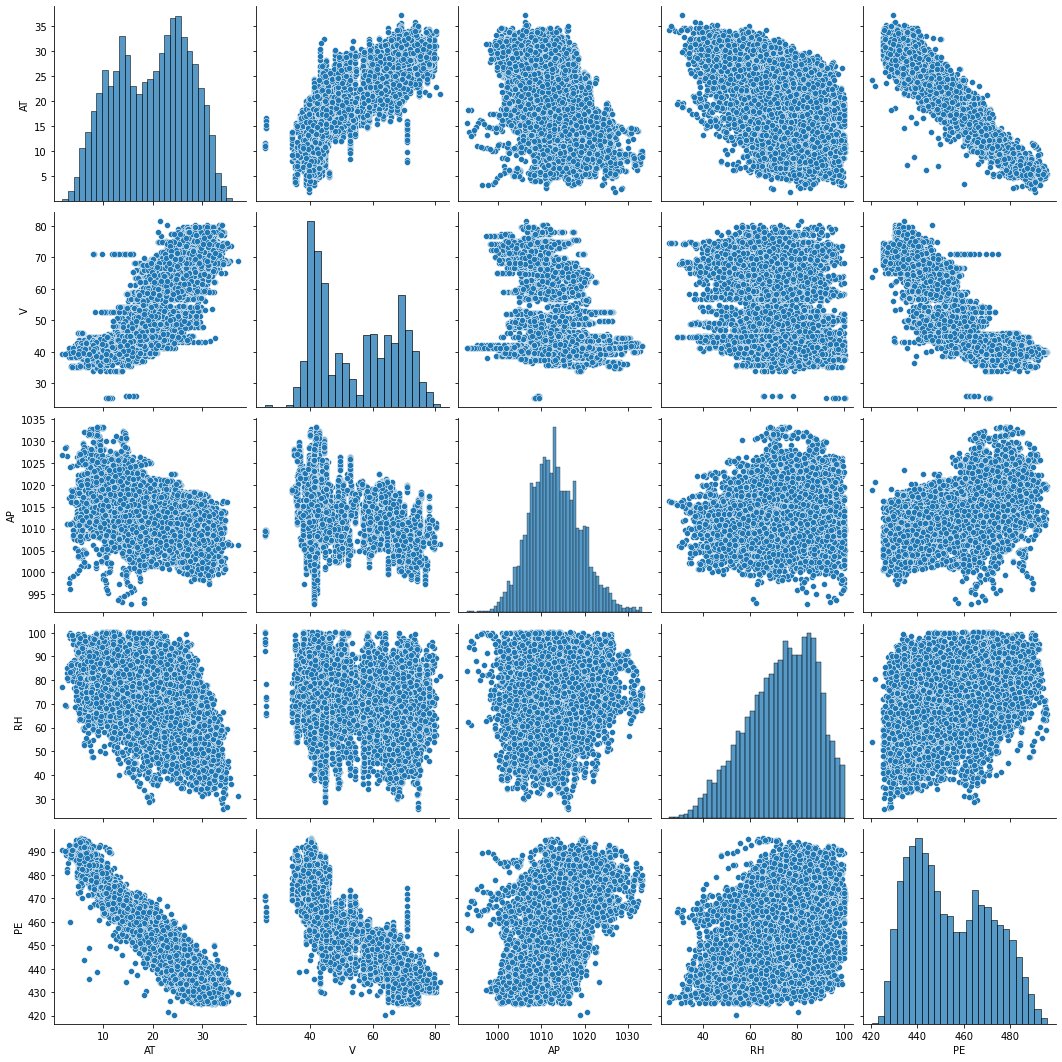

In [5]:
sns.pairplot(ccpp_df, height=3)

Findings: 
1. Strong linear relationship with AT and V to PE. 
2. although two independent variables, V and AT are somehow showing relations.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
ccpp_df = ccpp_df.apply(pd.to_numeric, errors='coerce')

In [7]:
mean = ccpp_df.mean()
median = ccpp_df.median()
range = ccpp_df.max() - ccpp_df.min()
q1_val = ccpp_df.quantile(0.25)
q3_val = ccpp_df.quantile(0.75)
iqr_val = q3_val - q1_val

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': range,
    'Q1': q1_val,
    'Q3': q3_val,
    'IQR': iqr_val
})

pd.DataFrame(summary_df, index = ['AT', 'V', 'AP', 'RH', 'PE'], \
                   columns = ['Mean', 'Median', 'Range', 'Q1', 'Q3', 'IQR'])

,Mean,Median,Range,Q1,Q3,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

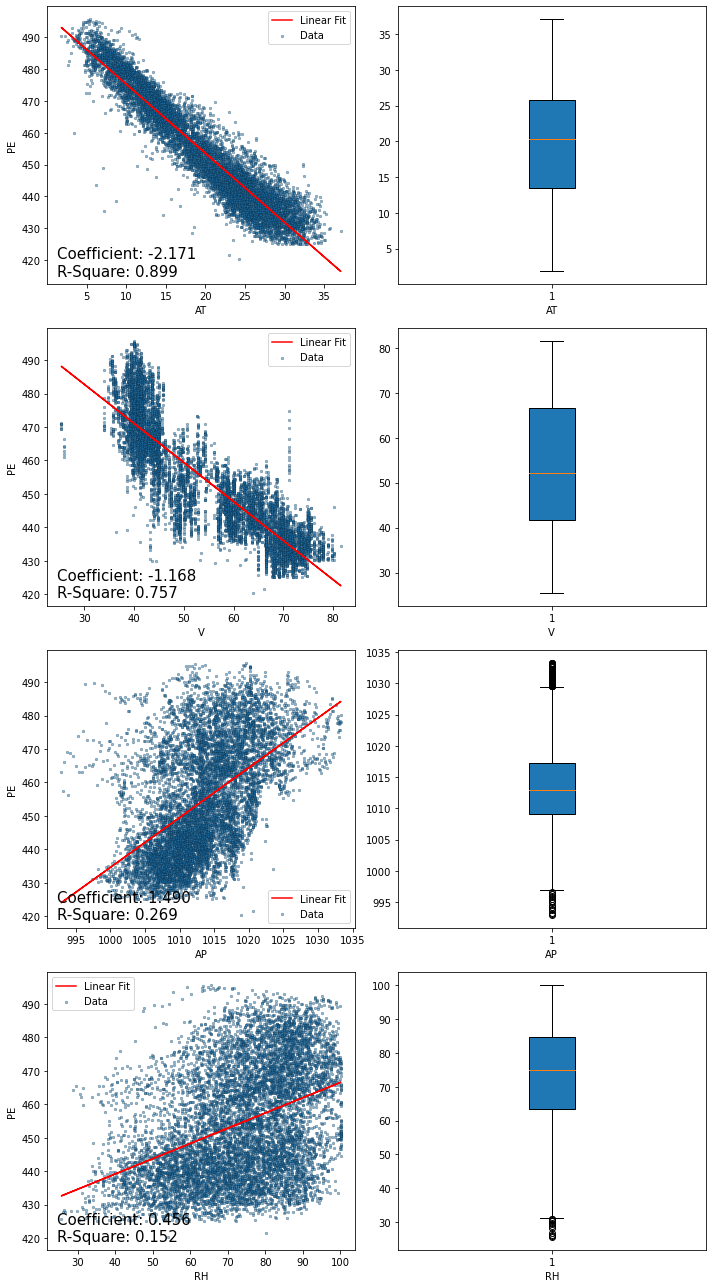

{'AT': -2.1713199585177927, 'V': -1.1681351265557125, 'AP': 1.4898716733991126, 'RH': 0.4556501022629802}


In [40]:
from scipy import stats

uni_co = {} #for question (e) to store coefficient    

def plot_linear_fit(x_data, y_data, feature_name):
    slope, intercept, r_value, p_value, _ = stats.linregress(x_data, y_data)
    line = slope * x_data + intercept

    plt.scatter(x_data, y_data, s = 8, label='Data', alpha=0.5, edgecolors='k', linewidths=0.3)
    plt.plot(x_data, line, color='red', label='Linear Fit')
    plt.xlabel(feature_name)
    plt.ylabel('PE')
    plt.legend()
    
    # Add coefficient to the plot
    plt.text(0.03, 0.03, f'Coefficient: {slope:.3f}\nR-Square: {r_value**2:.3f}', transform=plt.gca().transAxes, fontsize=15)

def plot_boxplot(x_data, feature_name):
    plt.boxplot(x_data, patch_artist=True)
    plt.xlabel(feature_name)

def draw_fits():
    fig, axes = plt.subplots(4, 2, figsize=(10, 18))
    features = ['AT', 'V', 'AP', 'RH']


    # Independant Vars
    y_data = ccpp_df['PE']

    for i, feature_name in enumerate(features):
        x_data = ccpp_df[feature_name] #define x_data
        
        plt.subplot(4, 2, 2 * i + 1)
        plot_linear_fit(x_data, y_data, feature_name)
        
        plt.subplot(4, 2, 2 * i + 2)
        plot_boxplot(x_data, feature_name)

        uni_co[feature_name] = stats.linregress(x_data, y_data).slope #for question (e)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__": # Start point excution for above functions.
    draw_fits()
    print(uni_co)

1) As answered to the earlier question, AT and V have strong linear relations, whereas AP and RH aren't.
2) Although AP and RH have many outliers, V has some illogical datapoints such as around V=70 (or V=15) it showed different PE values at the same V's which seemed do not conform the rest of the data.

### (d) Multiple Regression

In [41]:
import statsmodels.api as sm

ccpp_X = ccpp_df[['AT', 'V', 'AP', 'RH']]
ccpp_X = sm.add_constant(ccpp_X)  # adding intercepts 

ccpp_y = ccpp_df['PE'] #take PE columns to dependent values

# OLS for multiple regression
multimodel = sm.OLS(ccpp_y, ccpp_X).fit()

print(multimodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:48:11   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [42]:
print(multimodel.pvalues)

const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64


1. all p-values are relatively small (<0.05) thus, we can reject the null H0 that those predictors do not have significant association. => the model has signification to response.
2. R-squared value is 0.929, it is also showing that this regression model has significant association.

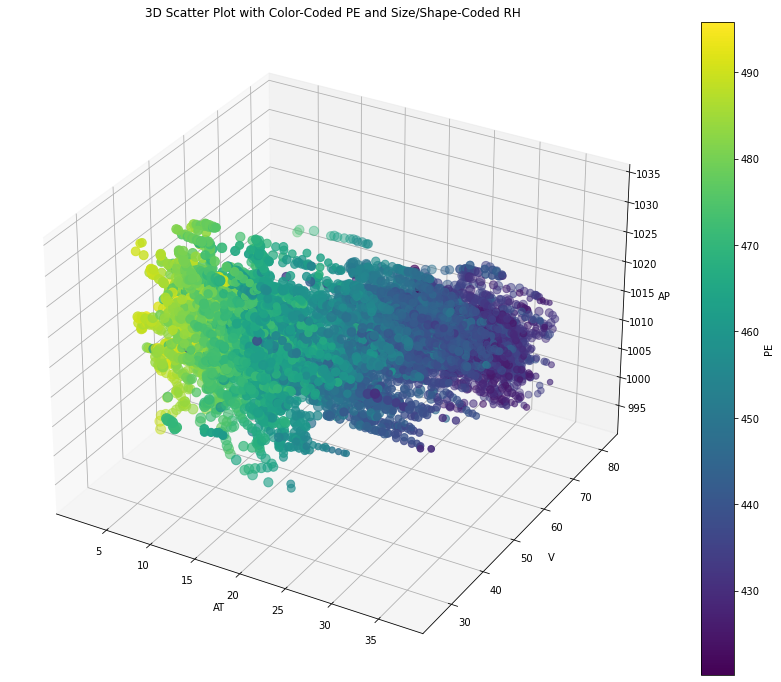

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# for reference creating 4 dimensional representation
x = ccpp_df['AT']
y = ccpp_df['V']
z = ccpp_df['AP']
rh = ccpp_df['RH'] 
pe = ccpp_df['PE'] 

# Create a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Note that c is color, s is size
scatter = ax.scatter(x, y, z, c=pe, cmap='viridis', marker='o', s=rh)

# Color description
cbar = plt.colorbar(scatter, label='PE')

ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('AP')
ax.set_title('3D Scatter Plot with Color-Coded PE and Size/Shape-Coded RH')

plt.show()

### (e) 1c Compare to 1d

In [47]:
multi_co = multimodel.params # getting values
multi_co = multi_co.to_dict()  # to dictionary format for later plotting
multi_co.pop('const') # remove const key for later plotting
print("Coefficients for each features of Multiple regression :","\n", multi_co)

Coefficients for each features of Multiple regression : 
 {'AT': -1.977513106635397, 'V': -0.23391642258249984, 'AP': 0.062082943780855215, 'RH': -0.1580541029164153}


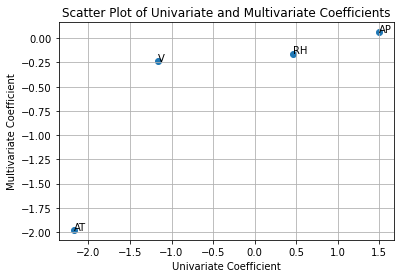

In [58]:
# Extract the values from the dictionaries
uni_co_values = list(uni_co.values())
multi_co_values = list(multi_co.values())


plt.scatter(uni_co_values, multi_co_values) # Plot the scatter plot
plt.grid()
plt.xlabel('Univariate Coefficient')
plt.ylabel('Multivariate Coefficient')
plt.title('Scatter Plot of Univariate and Multivariate Coefficients')
plt.annotate(text='AT', xy=(uni_co_values[0], multi_co_values[0]))
plt.annotate(text='V', xy=(uni_co_values[1], multi_co_values[1]))
plt.annotate(text='AP', xy=(uni_co_values[2], multi_co_values[2]))
plt.annotate(text='RH', xy=(uni_co_values[3], multi_co_values[3]))

plt.show()

### (f) Nonlinear Association

### (g) Interactions of Predictors

### (h) Improvement

### (i) KNN

### (j ) Compare KNN and Linear

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

### (b) What is our prediction with K = 1? Why?

### (c) What is our prediction with K = 3? Why?

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?